# English Layouts Evaluation

I decided to test English layouts with the evaluation method used with Russian ones.

In [1]:
from lib import Corpus, Keyboard, Layout, Result, STANDARD_KBD, std_key_shape, STD_EXTRA_KEYS, ERGODOX, compare
import pandas as pd

I took some New Yorker articles from archive.org. They're quite long. I replaced the pretty double/single quotes to standard, and long dash with standard hyphen, otherwise they're not counted at all.

## Position Penalties

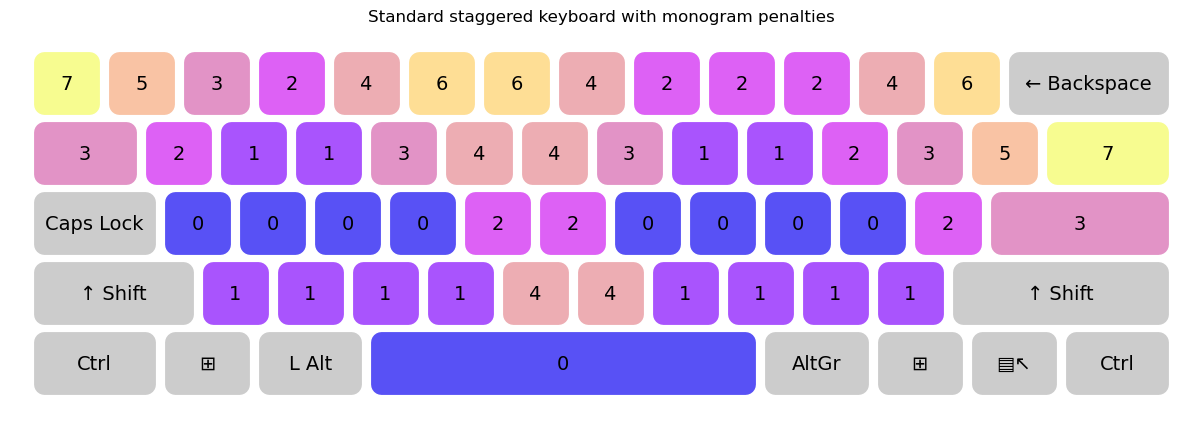

In [2]:
_ = STANDARD_KBD.display()

In [3]:
ENG = Corpus.from_path('english.txt')

In [4]:
eng_layouts = {
    'sholes1': r'''
    
`12345 67890-=
→qwert yuiop[]\
 asdfg hjkl;'¶
 zxcvb nm,./
⌴

~!"#$% ^&*()_+
 ∅∅∅∅∅ ∅∅∅∅∅{}|
 ∅∅∅∅∅ ∅∅∅∅:"∅
 ∅∅∅∅∅ ∅∅<>?
∅
''',

    'dvorak': r'''
`12345 67890[]
→',.py fgcrl/=\
 aoeui dhtns-¶
 ;qjkx bmwvz
⌴

~!"#$% ^&*(){}
 "<>∅∅ ∅∅∅∅∅?+|
 ∅∅∅∅∅ ∅∅∅∅∅_
 :∅∅∅∅ ∅∅∅∅∅
∅
''',
    'colemak': r'''
`12345 67890-=
→qwfpg jluy;[]\
 arstd hneio'¶
 zxcvb km,./
⌴

~!"#$% ^&*()_+
 ∅∅∅∅∅ ∅∅∅∅:{}|
 ∅∅∅∅∅ ∅∅∅∅∅"∅
 ∅∅∅∅∅ ∅∅<>?
∅
''',
  
    # note: 0 & 1 weren't there in the real layout.
    'sholes2': r'''
012345 6789$&z
→xpmch rtnsdgk`
 jbwfl aeiouy¶
 qv:;. ,!?-"_
⌴

~@#∅% ^∅*()_+
 ∅∅∅∅∅ ∅∅∅∅:{}|
 ∅∅∅∅∅ ∅∅∅∅∅∅
 ∅∅[]< >∅∅∅∅∅
∅
''',

}


In [5]:
LT = {'v': 'aeiou', 'c': 'bcdfghjklmnpqrstvwxyz'}

# these keys MUST be in any layout, otherwise the code throws an exception and halts
ENG_BASE = set('`-!?%*():;.,⌴¶abcdefghijklmnopqrstuvwxyz')

eng_res = {}
for k, l in eng_layouts.items():
    print(k, end=': ')
    eng_res[k] = r = Result(ENG, Layout(k, l, base_keys=ENG_BASE))
    print(r.score)

sholes1: key """ repeated: 2
2.5886838778388883
dvorak: key """ repeated: 2
1.178944972215786
colemak: key """ repeated: 2
1.259883009556794
sholes2: key ":" repeated: 2
key "_" repeated: 2
2.6773413332357734


# Standings

In [6]:
comments = {'sholes1': 'QWERTY, 1879', 'sholes2': 'Sholes\' last layout, 1889', 'dvorak': '1936', 'colemak': '2006'}
print(pd.DataFrame([(k, v.score.round(3), comments[k]) for k, v in eng_res.items()],
        columns=['layout', 'score', 'comment']).sort_values('score', ascending=True)
    .to_markdown(index=False))

| layout   |   score | comment                   |
|:---------|--------:|:--------------------------|
| dvorak   |   1.179 | 1936                      |
| colemak  |   1.26  | 2006                      |
| sholes1  |   2.589 | QWERTY, 1879              |
| sholes2  |   2.677 | Sholes' last layout, 1889 |


Dvorak layout is still the best, if we weigh bigrams seriously. Colemak was a mix of both, and scores slightly worse, but not as badly as I expected.

## Arrow Maps

The less arrows, the better.

Look at the arrow maps: almost all arrows are thin, and there are few of them. QWERTY has lots of thick arrows. Colemak has noteably more than Dvorak, but the score is quite ok.

I expected Colemak to have a lot of costs on the left hand, but it has more on the right.

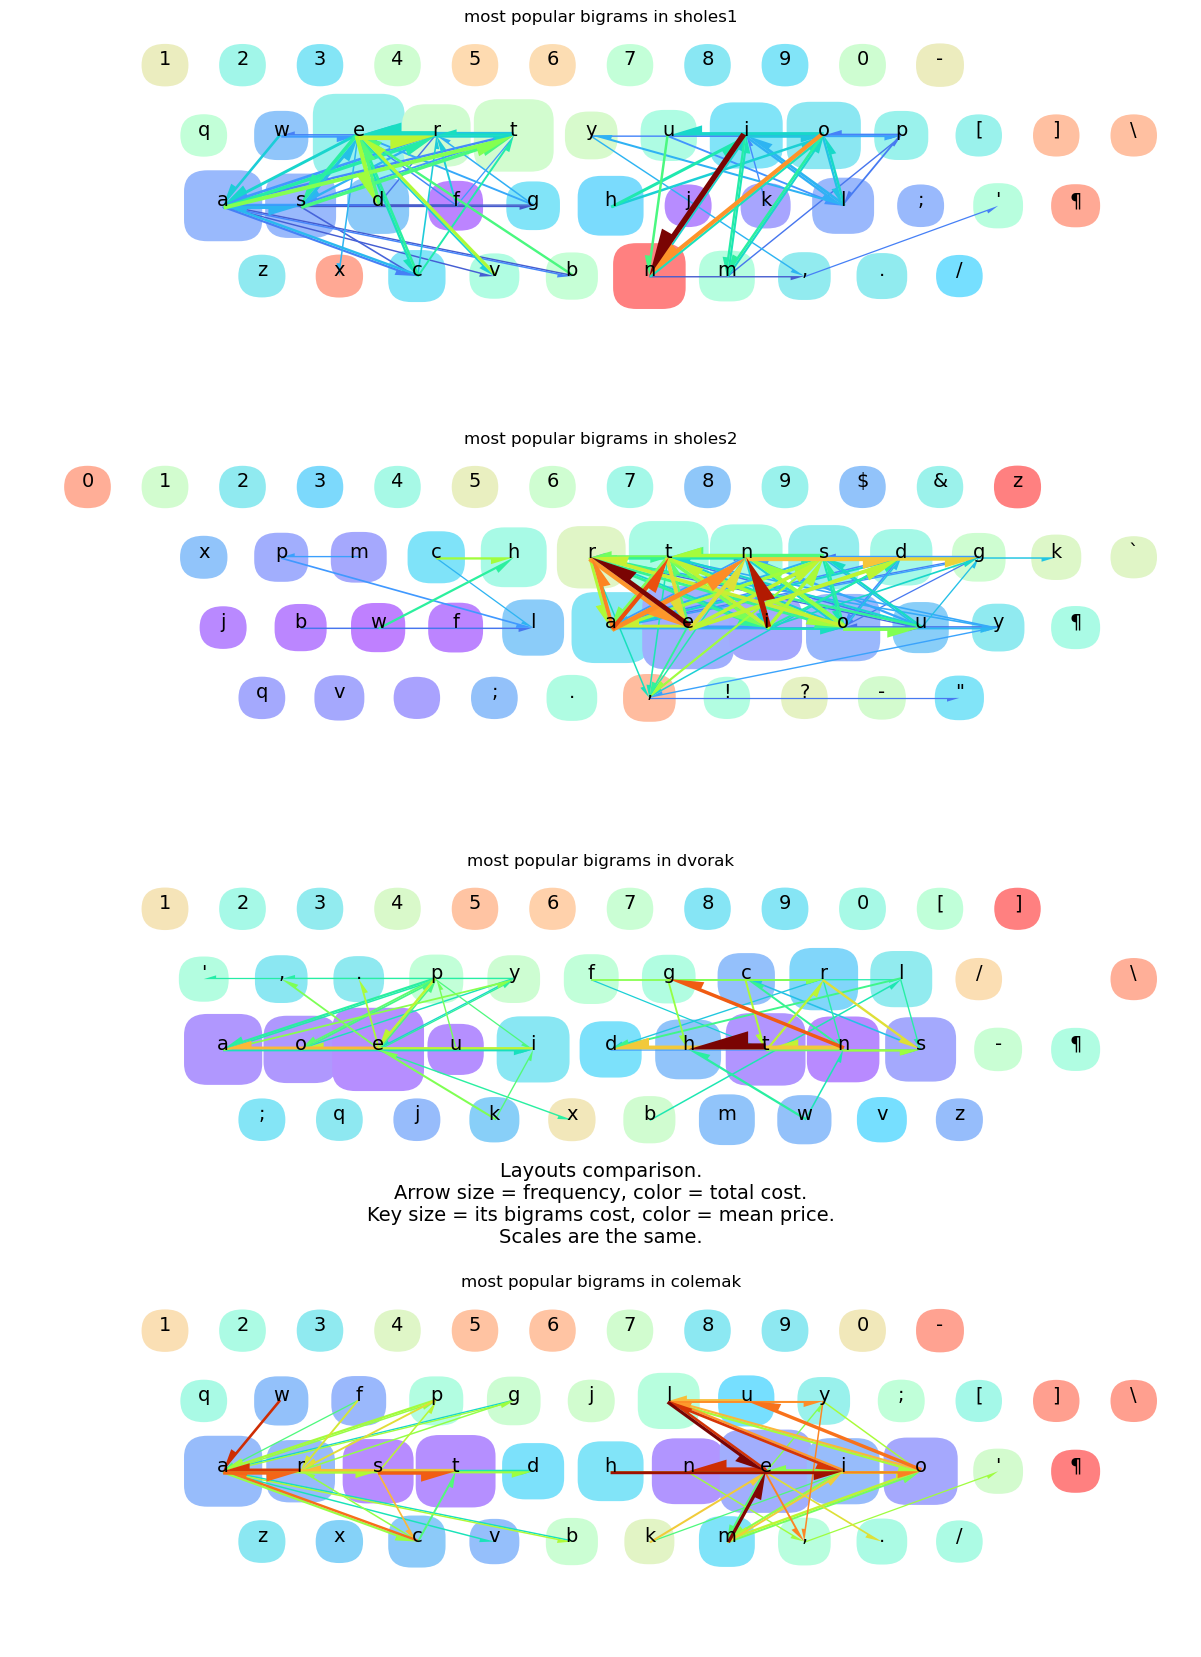

In [7]:
eng_res['sholes1'].combomap(eng_res['sholes2'], eng_res['dvorak'], eng_res['colemak'])